In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers,models
from tensorflow.keras.utils import to_categorical

In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

In [7]:
train_images = train_images.reshape(train_images.shape[0],28,28,1)

In [8]:
train_images[0].shape

(28, 28, 1)

In [9]:
test_images = test_images.reshape(test_images.shape[0],28,28,1)

In [10]:
test_images[0].shape

(28, 28, 1)

In [11]:
data_augumentation = tf.keras.Sequential([
    layers.RandomRotation(0.1),
    layers.RandomFlip(),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(0.1,0.1)
])

In [12]:
def create_model():
    inputs= keras.Input(shape = (28,28,1))
    x = data_augumentation(inputs)
    x = keras.layers.Conv2D(32,3,activation = 'relu',padding = 'same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Conv2D(32,3,activation = 'relu',padding = 'same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.MaxPool2D(2)(x)
    x = keras.layers.SpatialDropout2D(0.2)(x)

    x = keras.layers.Conv2D(64,3,activation = 'relu',padding = 'same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Conv2D(64,3,activation = 'relu',padding = 'same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.MaxPool2D(2)(x)
    x = keras.layers.SpatialDropout2D(0.2)(x)

    residual = x
    x = keras.layers.Conv2D(64,3,activation = 'relu', padding = 'same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Conv2D(64,3,activation = 'relu', padding = 'same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.add([x,residual])
    
    x = keras.layers.GlobalAveragePooling2D()(x)
    x = keras.layers.Dense(256,activation = 'relu')(x)
    outputs = keras.layers.Dense(10 , activation = 'softmax')(x)

    model = keras.Model(inputs,outputs)
    return model
    

In [13]:
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
callbacks = [EarlyStopping(patience=10,restore_best_weights=True)]

In [15]:
model = create_model()

In [16]:
from tensorflow.keras.optimizers import Adam

In [17]:
model.compile(optimizer=Adam(learning_rate=0.001), loss ='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
history = model.fit(train_images,train_labels , callbacks = callbacks , epochs = 50, batch_size = 8 , validation_data=(test_images,test_labels))

Epoch 1/50
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 217s 28ms/step - accuracy: 0.6033 - loss: 1.0674 - val_accuracy: 0.7460 - val_loss: 0.7195
Epoch 2/50
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 195s 26ms/step - accuracy: 0.7584 - loss: 0.6572 - val_accuracy: 0.7860 - val_loss: 0.6292
Epoch 3/50
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 196s 26ms/step - accuracy: 0.7851 - loss: 0.5855 - val_accuracy: 0.7833 - val_loss: 0.5938
Epoch 4/50
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 199s 27ms/step - accuracy: 0.8041 - loss: 0.5398 - val_accuracy: 0.8159 - val_loss: 0.5132
Epoch 5/50
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 202s 27ms/step - accuracy: 0.8131 - loss: 0.5200 - val_accuracy: 0.8282 - val_loss: 0.4970
Epoch 6/50
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 206s 28ms/step - accuracy: 0.8200 - loss: 0.4975 - val_accuracy: 0.8147 - val_loss: 0.5696
Epoch 7/50
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 211s 28ms/step - accuracy: 0.8272 - loss: 0.4765 - val_accuracy: 0.8570 - val_loss: 0.3960
Epoch 8/50
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 212s 28ms/step - accuracy: 

In [26]:
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']

In [27]:
from sklearn.metrics import classification_report

In [28]:
import pprint

In [29]:
y_pred = model.predict(test_images).argmax(axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 62ms/step


In [30]:
pprint.pprint(classification_report(test_labels,y_pred))

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.86      0.79      0.83      1000\n'
 '           1       0.99      0.97      0.98      1000\n'
 '           2       0.87      0.87      0.87      1000\n'
 '           3       0.89      0.88      0.89      1000\n'
 '           4       0.85      0.82      0.83      1000\n'
 '           5       0.96      0.97      0.97      1000\n'
 '           6       0.69      0.76      0.72      1000\n'
 '           7       0.94      0.94      0.94      1000\n'
 '           8       0.96      0.98      0.97      1000\n'
 '           9       0.97      0.95      0.96      1000\n'
 '\n'
 '    accuracy                           0.90     10000\n'
 '   macro avg       0.90      0.90      0.90     10000\n'
 'weighted avg       0.90      0.90      0.90     10000\n')


In [31]:
import seaborn as sns

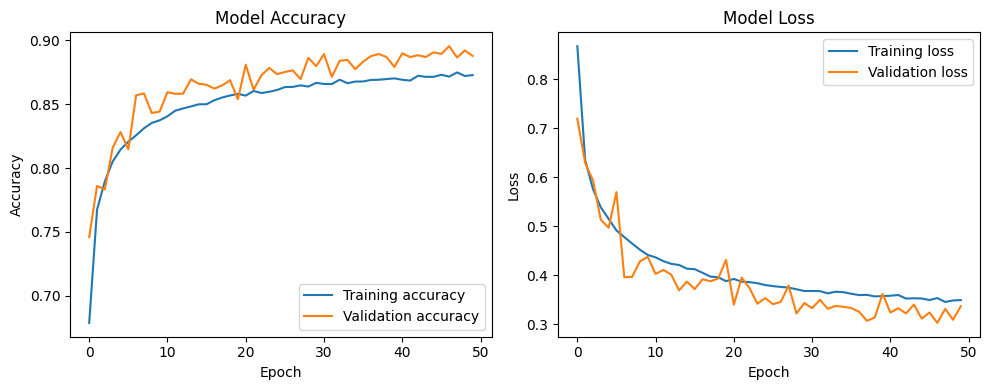

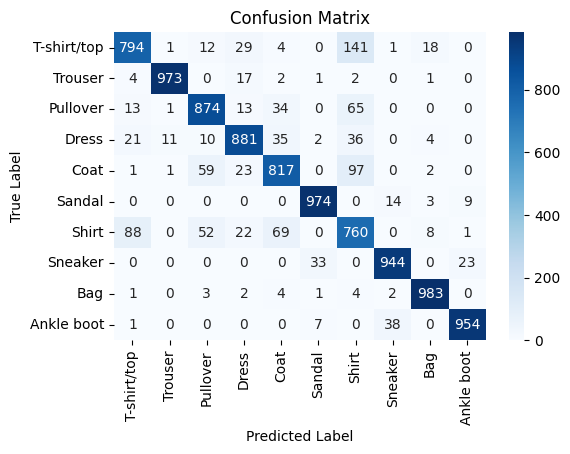

In [32]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label = 'Training accuracy')
plt.plot(history.history['val_accuracy'],label = 'Validation accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label = 'Training loss')
plt.plot(history.history['val_loss'],label = 'Validation loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = tf.math.confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


plot_confusion_matrix(test_labels, y_pred, class_names)



In [33]:
import numpy as np
from PIL import Image
import tensorflow as tf
def preprocess_image(image_path):
    img = Image.open(image_path)

    if img.mode!='L':
        img = img.convert('L')

    img = img.resize((28,28))

    img_array = np.array(img).astype('float32')/255.0
    img_array = img_array.reshape(1,28,28,1)
    
    return img_array

In [34]:
def predict_class(model, image_array):
    prediction = model.predict(image_array)
    print(prediction)
    class_index = np.argmax(prediction)
    print(class_index)
    class_names = ['T-shirt/top', 'Bag', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Ankle Boot', 'Trouser']
    print(len(class_names))
    predicted_class = class_names[class_index]
    confidence = prediction[0][class_index]
    return predicted_class, confidence

In [35]:
image ='ankle boot.jpg'
processed_image = preprocess_image(image)
predicted_class,confidence = predict_class(model, processed_image)

print(f"Predicted class: {predicted_class}")
print(f"Confidence: {confidence:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
[[1.8052000e-03 7.1573876e-09 1.4092866e-04 1.3967234e-07 1.8304173e-06
  1.8961511e-08 2.6359829e-05 7.7557905e-11 9.9802446e-01 1.1918933e-06]]
8
10
Predicted class: Ankle Boot
Confidence: 1.00


In [36]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 28, 28, 1)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ sequential (Sequential)       │ (None, 28, 28, 1)         │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 28, 28, 32)        │             320 │ sequential[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 28, 28, 32)        │             128 │ conv2d[0][0]               │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 28, 28, 32)        │           9,248 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 28, 28, 32)        │             128 │ conv2d_1[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 14, 14, 32)        │               0 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ spatial_dropout2d             │ (None, 14, 14, 32)        │               0 │ max_pooling2d[0][0]        │
│ (SpatialDropout2D)            │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 14, 14, 64)        │          18,496 │ spatial_dropout2d[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 14, 14, 64)        │             256 │ conv2d_2[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 14, 14, 64)        │          36,928 │ batch_normalization_2[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_3         │ (None, 14, 14, 64)        │             256 │ conv2d_3[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_1               │ (None, 7, 7, 64)          │               0 │ batch_normalization_3[0][… │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ spatial_dropout2d_1           │ (None, 7, 7, 64)          │               0 │ max_pooling2d_1[0][0]      │
│ (SpatialDropout2D)            │                           │               

 Total params: 476,736 (1.82 MB)

 Trainable params: 158,698 (619.91 KB)

 Non-trainable params: 640 (2.50 KB)

 Optimizer params: 317,398 (1.21 MB)